In [1]:
from examples.util.getDataset import getDataset
from examples.util.plotting import plot_w
from examples.util.test_fns import *
from examples.util.testing import shrimp_v_random, growth
from examples.util.metrics import shrimp_test, make_l2_loss
from sparse_rf.util import *
from sparse_rf.modules import make_A, make_W
from sparse_rf.algs import shrimp, l2, l1, sindy
from functools import partial
import matplotlib.pyplot as plt
from math import ceil

In [2]:
fn = fn7
q = 2
d = 10
m = 200
N = 1000
l = 1e-13

Xtr, Xte, Ytr, Yte = getDataset(fn, d=d, m=m)

trials = 10

## $1/q$ variance

In [3]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l)

In [4]:
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))

Min l2: 0.04068584184024201
SHRIMP: 9.728321329789916e-05
Random pruning: 0.03424098125678321


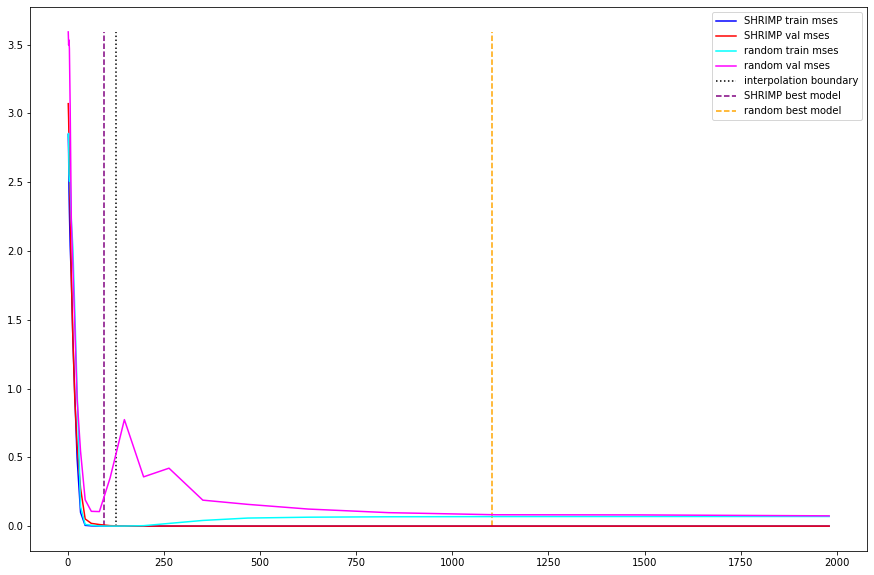

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, svr_q.train_mse_s, label="SHRIMP train mses", color="blue")
plt.plot(svr_q.lengths, svr_q.val_mse_s, label="SHRIMP val mses", color="red")
plt.plot(svr_q.lengths, svr_q.train_mse_r, label="random train mses", color="cyan")
plt.plot(svr_q.lengths, svr_q.val_mse_r, label="random val mses", color="magenta")
plt.vlines(m*0.7*0.9, 0, max(max(svr_q.train_mse_s), max(svr_q.val_mse_s), max(svr_q.train_mse_r), max(svr_q.val_mse_r)), linestyles="dotted", colors="black", label="interpolation boundary")
plt.vlines(svr_q.n_best_s, 0, max(max(svr_q.train_mse_s), max(svr_q.val_mse_s), max(svr_q.train_mse_r), max(svr_q.val_mse_r)), linestyles="dashed", colors="purple", label="SHRIMP best model")
plt.vlines(svr_q.n_best_r, 0, max(max(svr_q.train_mse_s), max(svr_q.val_mse_s), max(svr_q.train_mse_r), max(svr_q.val_mse_r)), linestyles="dashed", colors="orange", label="random best model")
plt.legend(loc="best")
plt.show()

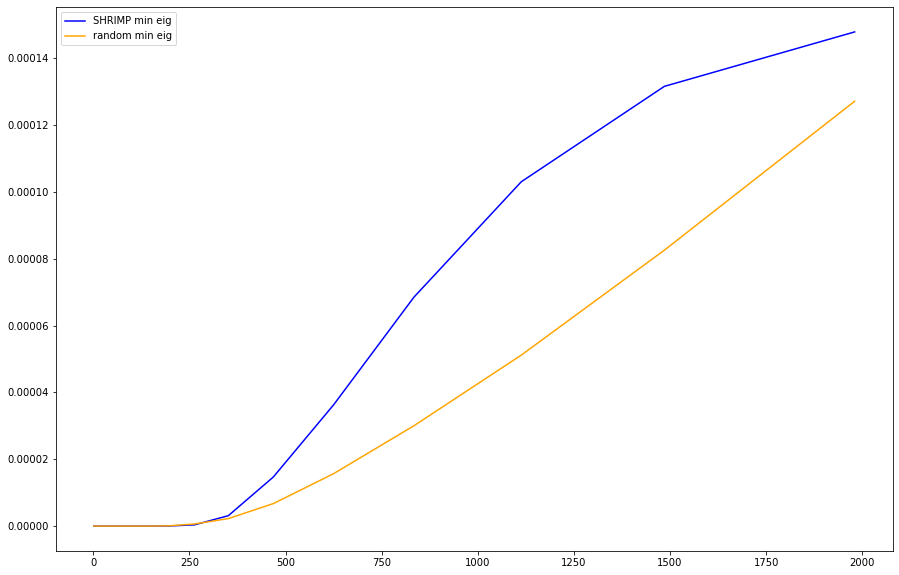

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, svr_q.eigs_s_min, label="SHRIMP min eig", color="blue")
plt.plot(svr_q.lengths, svr_q.eigs_r_min, label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()

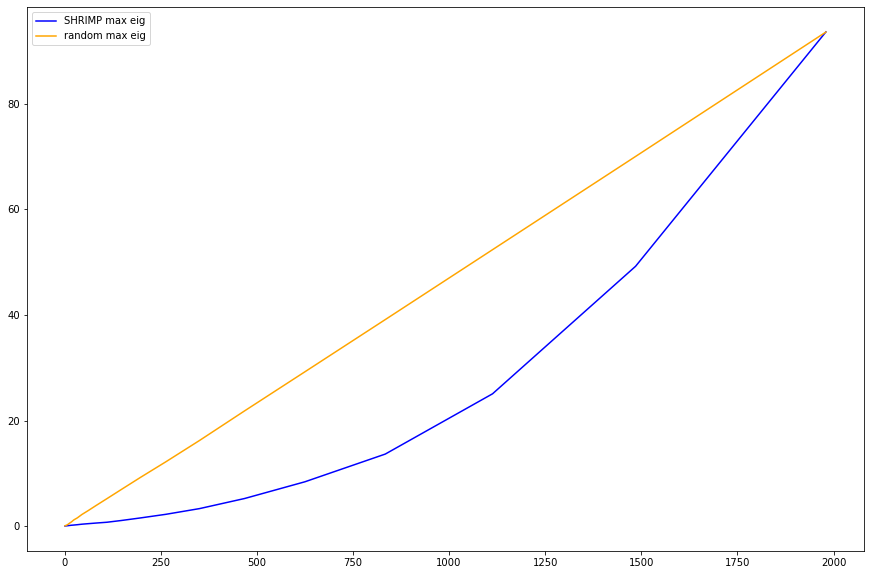

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, svr_q.eigs_s_max, label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, svr_q.eigs_r_max, label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()

## 1000 variance

In [8]:
svr_q = shrimp_v_random(trials, Xtr, Ytr, Xte, Yte, q, N, l, scale=np.sqrt(1000))

In [9]:
print("Min l2: {}".format(svr_q.err_l2))
print("SHRIMP: {}".format(svr_q.err_shrimp))
print("Random pruning: {}".format(svr_q.err_r))

Min l2: 4.5747096983627165
SHRIMP: 5.190995160954474
Random pruning: 4.972726068083675


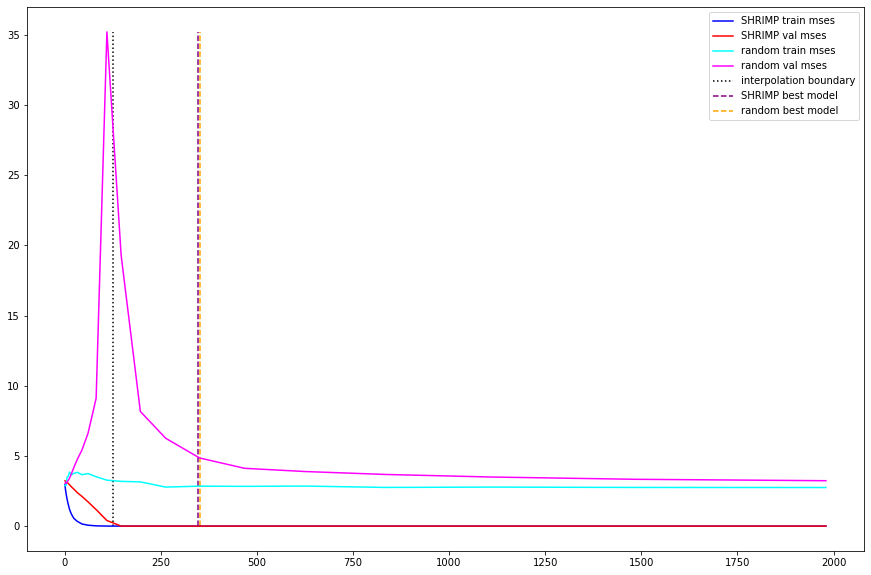

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, svr_q.train_mse_s, label="SHRIMP train mses", color="blue")
plt.plot(svr_q.lengths, svr_q.val_mse_s, label="SHRIMP val mses", color="red")
plt.plot(svr_q.lengths, svr_q.train_mse_r, label="random train mses", color="cyan")
plt.plot(svr_q.lengths, svr_q.val_mse_r, label="random val mses", color="magenta")
plt.vlines(m*0.7*0.9, 0, max(max(svr_q.train_mse_s), max(svr_q.val_mse_s), max(svr_q.train_mse_r), max(svr_q.val_mse_r)), linestyles="dotted", colors="black", label="interpolation boundary")
plt.vlines(svr_q.n_best_s, 0, max(max(svr_q.train_mse_s), max(svr_q.val_mse_s), max(svr_q.train_mse_r), max(svr_q.val_mse_r)), linestyles="dashed", colors="purple", label="SHRIMP best model")
plt.vlines(svr_q.n_best_r, 0, max(max(svr_q.train_mse_s), max(svr_q.val_mse_s), max(svr_q.train_mse_r), max(svr_q.val_mse_r)), linestyles="dashed", colors="orange", label="random best model")
plt.legend(loc="best")
plt.show()

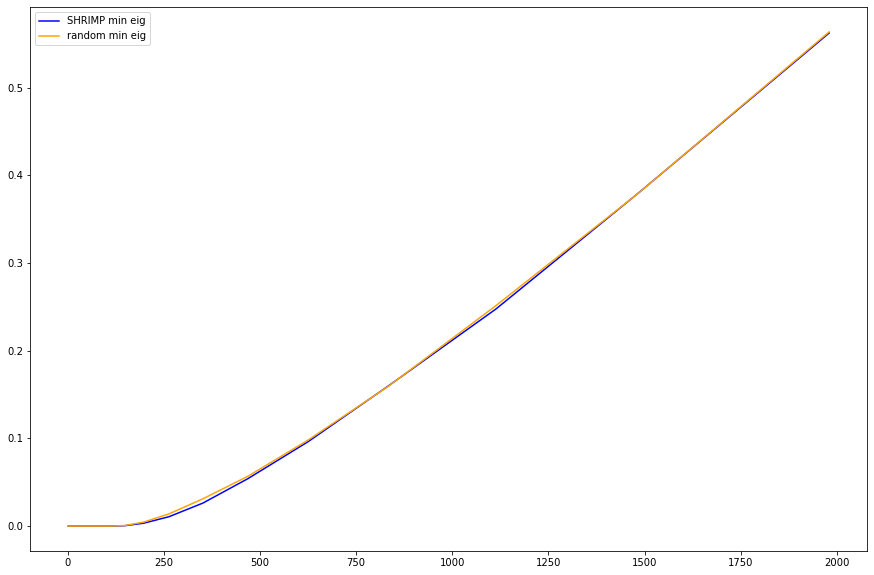

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, svr_q.eigs_s_min, label="SHRIMP min eig", color="blue")
plt.plot(svr_q.lengths, svr_q.eigs_r_min, label="random min eig", color="orange")
plt.legend(loc="best")
plt.show()

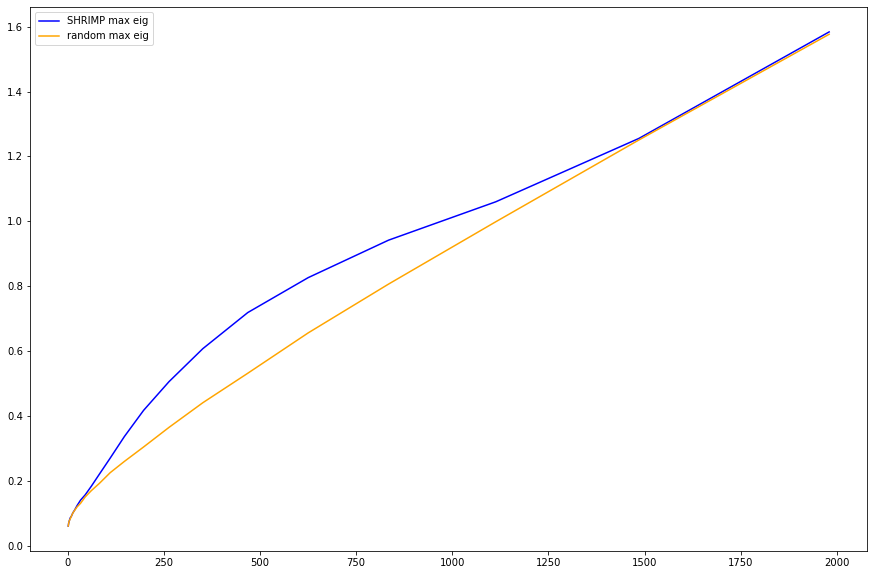

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(svr_q.lengths, svr_q.eigs_s_max, label="SHRIMP max eig", color="blue")
plt.plot(svr_q.lengths, svr_q.eigs_r_max, label="random max eig", color="orange")
plt.legend(loc="best")
plt.show()